<a href="https://colab.research.google.com/github/RifatMuhtasim/Machine_Learning/blob/main/Feature_Engineering/Remove_Outliers_using_Std_and_ZScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [3]:
# Read the dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/bhp.csv")

print("Shape:", df1.shape)
df1.head()

Shape: (13200, 7)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


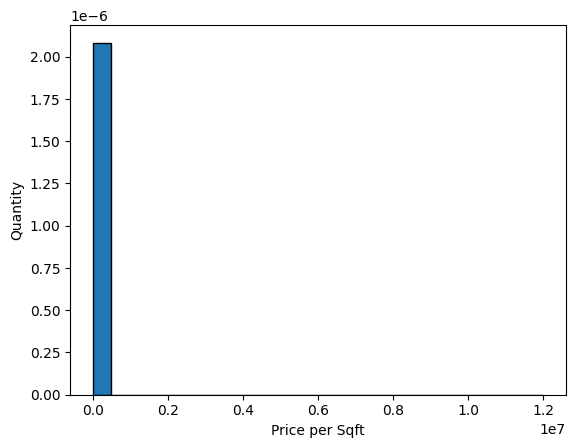

In [5]:
plt.hist(df1['price_per_sqft'], bins=25, density=True, edgecolor='black')
plt.xlabel("Price per Sqft")
plt.ylabel("Quantity")
plt.show()

# Remove Outliers using percentile

In [6]:
min_threshold, max_threshold = df1['price_per_sqft'].quantile([0.001, 0.999])

print("Min Threshold Value:", min_threshold)
print("Max Threshold Value:", max_threshold)

Min Threshold Value: 1366.184
Max Threshold Value: 50959.36200000098


In [7]:
df2 = df1[ (df1['price_per_sqft'] > min_threshold) & (df1['price_per_sqft'] < max_threshold) ]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


# Remove Outliers 4 Standard deviation

In [8]:
lower_limit = df2['price_per_sqft'].mean() - 4 * df2['price_per_sqft'].std()
upper_limit = df2['price_per_sqft'].mean() + 4 * df2['price_per_sqft'].std()

In [9]:
df3 = df2[ (df2['price_per_sqft'] > lower_limit) & (df2['price_per_sqft'] < upper_limit) ]

df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


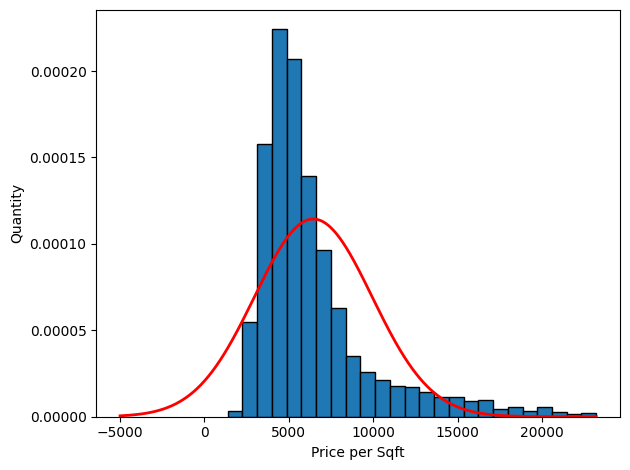

In [10]:
# Plot a Histogram with Bell Curve

plt.hist(df3['price_per_sqft'], bins=25, density=True, edgecolor='black')
plt.xlabel("Price per Sqft")
plt.ylabel("Quantity")

rng = np.arange( -5000, df3['price_per_sqft'].max(), 0.1  )
plt.plot(rng, norm.pdf(rng, df3['price_per_sqft'].mean(), df3['price_per_sqft'].std() ), color="red", lw=2)

plt.tight_layout()
plt.show()

# Remove Outliers using 3 ZScore

In [11]:
df3['zscore'] = (df3['price_per_sqft'] - df3['price_per_sqft'].mean()) / df3['price_per_sqft'].std()
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601


In [12]:
df = df3[ (df3['zscore'] > -3) & ( df3['zscore'] < 3 ) ]
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601


In [13]:
print("Total Data Remove:", df1.shape[0] - df.shape[0])

Total Data Remove: 473
